# <span style="color:red">**PRCP-1001 - Rice Leaf Disease Detection Using CNN**</span>


#### *Team ID: PTID-CDS-JAN-25-2373*


# **Problem Statement**

#### Task 1
Prepare a complete data analysis report on the given data.

#### Task 2
Create a model which can classify the three major attacking diseases of ***rice plants like leaf blast, bacterial blight and brown spot***.

#### Task3
Analyze various techniques like Data Augmentation, etc and create a report on that.




# **Description about the dataset**
This dataset contains 120 jpg images of disease-infected rice leaves. The images are grouped into 3 classes based on the type of disease. There are 40 images in each class.
Classes

●	Leaf smut

●	Brown spot

●	Bacterial leaf blight


# **Importing Libraries**

In [1]:
# **Libraries for Preprocessing**
import numpy as np  # Numerical operations
import os  # File system operations
import cv2 as cv  # Image processing
import random  # Randomization
import matplotlib.pyplot as plt  # Visualization
import matplotlib.image as mpimg  # Image manipulation


from sklearn.model_selection import train_test_split  # Data splitting


import tensorflow as tf  # Deep learning framework
from tensorflow import keras  # Keras high-level API
from tensorflow.keras import layers, models  # Model-building utilities
from tensorflow.keras.models import Sequential  # Sequential model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten

from tensorflow.keras.optimizers import SGD,Adam  # Optimizer with momentum
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau  # Training callbacks


from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Data augmentation
from tensorflow.keras.applications import MobileNetV2  # Pretrained model


# **Libraries to Ignore Warnings**
import warnings  # Suppress unnecessary warnings
warnings.filterwarnings('always')  # Always show warnings (can be customized)
warnings.filterwarnings('ignore')  # Ignore all warnings



# **Importing Data**

In [3]:
# Defining dataset path
data_dir = "/content/drive/MyDrive/Project_datamites/Rice_leaf"

# Get class names (subfolders)
class_names = os.listdir(data_dir)
class_names


['Bacterial leaf blight', 'Brown spot', 'Leaf smut']

# **Distribution of classes**

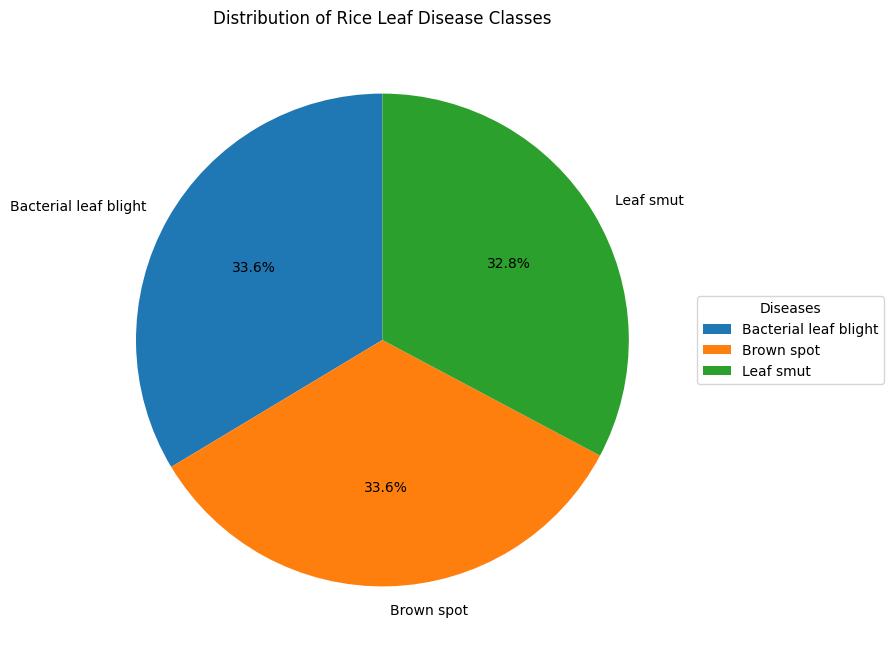

In [4]:
class_counts = {class_name: len(os.listdir(os.path.join(data_dir, class_name))) for class_name in class_names}
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    class_counts.values(),
    labels=class_counts.keys(),
    autopct='%1.1f%%',
    startangle=90,
)
plt.title("Distribution of Rice Leaf Disease Classes")
plt.legend(wedges, class_counts.keys(), title="Diseases", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()



Class 'Bacterial leaf blight' has 40 images.
Class 'Brown spot' has 40 images.
Class 'Leaf smut' has 39 images.


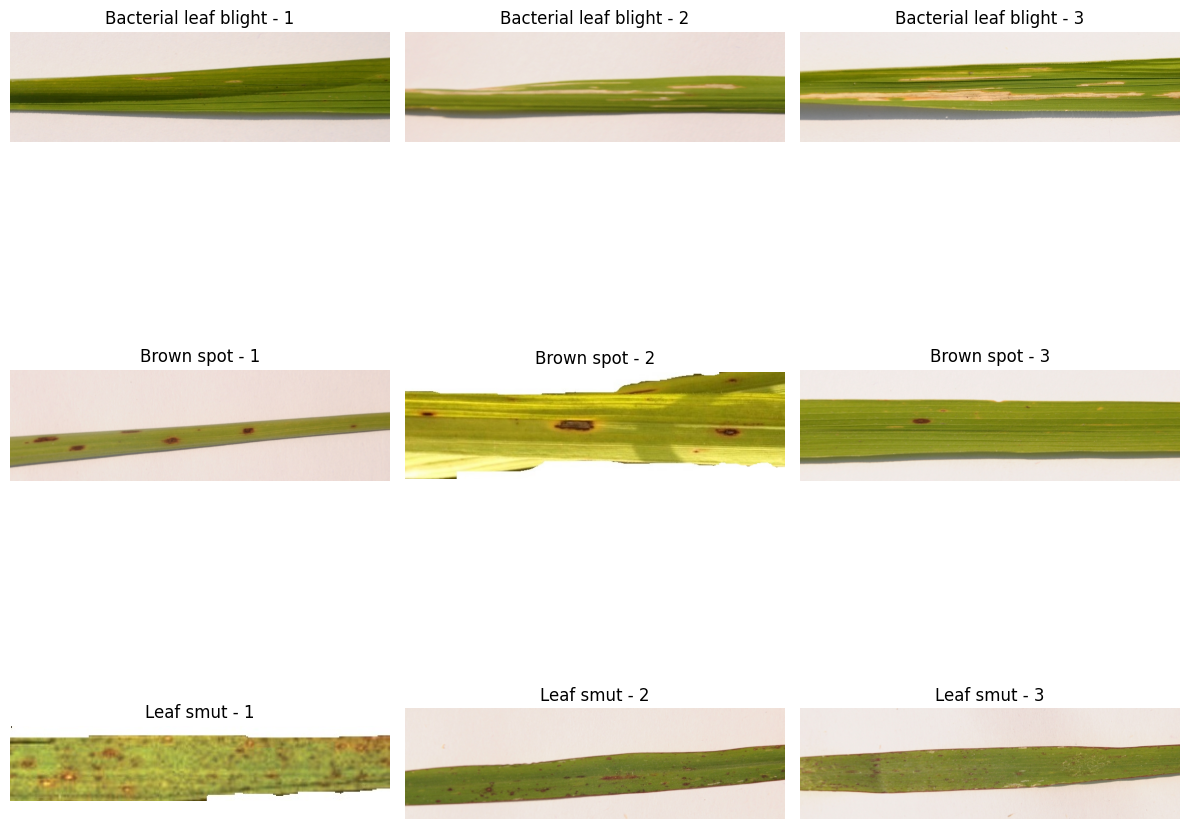


Total Images in Dataset: 119


In [5]:
# Create a figure to display images
fig, axes = plt.subplots(3, 3, figsize=(12, 12))

# Initialize total image counter
total_images = 0

# Loop through each class and display images
for i, class_name in enumerate(class_names):
    class_path = os.path.join(data_dir, class_name)
    images = os.listdir(class_path)[:3]  # Get first 3 images from each class

    # Count total images in the class
    num_images = len(os.listdir(class_path))
    total_images += num_images  # Add to total count

    print(f"Class '{class_name}' has {num_images} images.")  # Print class-wise count

    for j, image_name in enumerate(images):
        image_path = os.path.join(class_path, image_name)
        img = mpimg.imread(image_path)

        axes[i, j].imshow(img)
        axes[i, j].axis("off")
        axes[i, j].set_title(f"{class_name} - {j+1}")

plt.tight_layout()
plt.show()

print(f"\nTotal Images in Dataset: {total_images}")


# **Preparing the dataset**

In [6]:
def create_dataset(directory, categories):
    data = []
    for category in categories:
        path = os.path.join(directory, category)
        class_label = categories.index(category)
        for img in os.listdir(path):
            try:
                img_path = os.path.join(path, img)
                image = cv.imread(img_path)
                image = cv.cvtColor(image, cv.COLOR_BGR2RGB)  # Convert to RGB
                image = cv.resize(image, (224, 224))
                data.append([image, class_label])
            except Exception as e:
                pass
    return data

In [7]:
data = create_dataset(data_dir,class_names)
random.shuffle(data)

# **Split data into features and labels**

In [8]:
# Split data into features and labels
x, y = [], []
for images, label in data:
    x.append(images)
    y.append(label)

In [9]:
x = np.array(x) / 255.0  # Normalize
y = np.array(y)

# **Spliting the data into Train and Test**

In [10]:
# Split into training (70%) and temporary set (30%)
x_train, x_temp, y_train, y_temp = train_test_split(
    x, y, test_size=0.3, random_state=42, stratify=y
)

# Split the temporary set equally into validation (15%) and test (15%)
x_val, x_test, y_val, y_test = train_test_split(
    x_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

print(f"Training set: {len(x_train)} samples")
print(f"Validation set: {len(x_val)} samples")
print(f"Test set: {len(x_test)} samples")

Training set: 83 samples
Validation set: 18 samples
Test set: 18 samples


## Added stratify=y and stratify=y_temp
Ensures each set maintains the same class distribution as the original dataset.

## Consistent Variable Naming
x_train, x_temp, y_train, y_temp (first split)
x_val, x_test, y_val, y_test (second split)

# **Model Building**

### *First model using typical CNN model*

In [11]:
model = models.Sequential([

    layers.Conv2D(32, (3, 3), activation='relu', padding="same", input_shape=(224, 224, 3)),
    layers.Conv2D(64, (3, 3), activation='relu', padding="same"),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),


    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.6),  # Reduces overfitting
    layers.Dense(3, activation='softmax')
])


model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 224, 224, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 110, 110, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 55, 55, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 193600)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      24,780,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,845,699 (94.78 MB)

 Trainable params: 24,845,699 (94.78 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# Define EarlyStopping callback
early_stopping = EarlyStopping(
    monitor="val_accuracy",  # Monitor validation loss
    patience=5,          # Stop after 5 epochs of no improvement
    restore_best_weights=True,  # Restore the best model weights
    verbose=1)

history = model.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=20,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 22s 5s/step - accuracy: 0.3405 - loss: 1.2941 - val_accuracy: 0.3333 - val_loss: 1.3861
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - accuracy: 0.3601 - loss: 1.4006 - val_accuracy: 0.2778 - val_loss: 1.0799
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 0.4775 - loss: 1.0508 - val_accuracy: 0.3333 - val_loss: 1.1111
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 193ms/step - accuracy: 0.4275 - loss: 1.1099 - val_accuracy: 0.3889 - val_loss: 1.0700
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 135ms/step - accuracy: 0.5115 - loss: 1.0186 - val_accuracy: 0.3333 - val_loss: 1.0558
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - accuracy: 0.4281 - loss: 1.0333 - val_accuracy: 0.3889 - val_loss: 1.0285
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 176ms/step - accuracy: 0.5938 - loss: 0.9202 - val_accuracy: 0.4444 - val_loss: 1.0061
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 170ms/step - accuracy: 0.5881 - loss: 0.9205 - val_accuracy: 0.5000 - val_loss: 1

In [13]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(f"Validation Accuracy: {val_acc:.4f}")
print(f"Validation Loss: {val_loss:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.6667 - loss: 1.0210
Validation Accuracy: 0.6667
Validation Loss: 1.0210


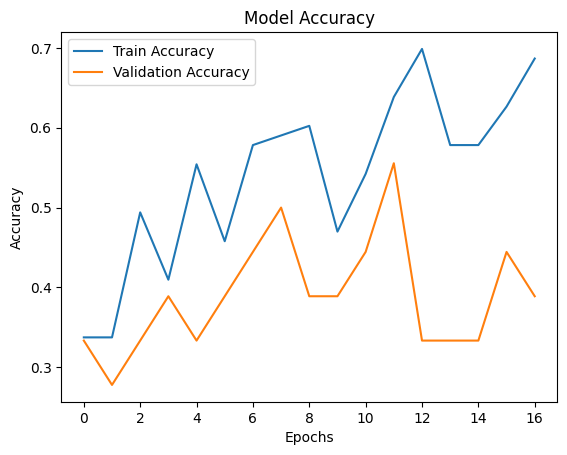

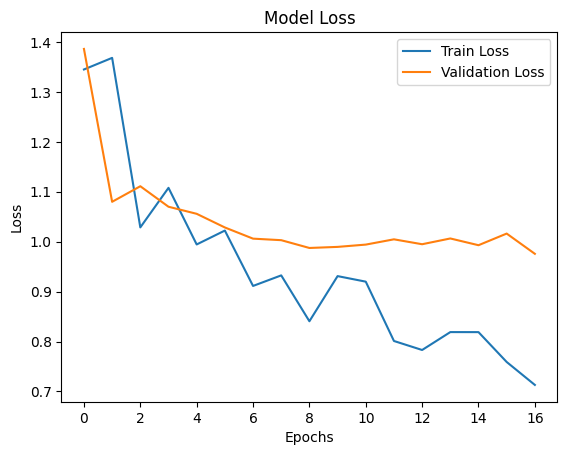

In [14]:
# Accuracy Plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

# Loss Plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')
plt.show()


### *Second model using transfer learning*

## Transfer Learning
**Transfer Learning** is a deep learning technique where a pre-trained model (trained on a large dataset like ImageNet) is adapted to a new but related task. Instead of training from scratch, we reuse learned features, fine-tune some layers, and train only the classifier, saving time and improving accuracy, especially for small datasets

MobileNetV2 improves efficiency with inverted residuals and linear bottlenecks, reducing computations while preserving accuracy. It is lightweight, fast, and optimized for mobile applications like image classification and object detection.

In [15]:
from tensorflow.keras.applications import MobileNetV2


base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze pretrained layers

model_trans= Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation="relu"),
    Dense(128, activation="relu"),
    Dense(64, activation="relu"),
    Dense(32, activation="relu"),
    Dense(16, activation="relu"),
    Dropout(0.2),
    Dense(3, activation="softmax")
])

model_trans.compile(optimizer=Adam(learning_rate=0.0001), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [16]:
model_trans.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 256)                 │         327,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 3)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,629,731 (10.03 MB)

 Trainable params: 371,747 (1.42 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [17]:
# Define EarlyStopping callback
early_stopping = EarlyStopping(
    monitor="val_loss",  # Monitor validation loss
    patience=10,          # Stop after 5 epochs of no improvement
    restore_best_weights=True,  # Restore the best model weights
    verbose=1
)

history = model_trans.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=100,`
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 21s 5s/step - accuracy: 0.3679 - loss: 1.1750 - val_accuracy: 0.3333 - val_loss: 1.1406
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 127ms/step - accuracy: 0.3150 - loss: 1.0986 - val_accuracy: 0.3333 - val_loss: 1.0918
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 124ms/step - accuracy: 0.3388 - loss: 1.0353 - val_accuracy: 0.3333 - val_loss: 1.0626
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.3352 - loss: 1.0369 - val_accuracy: 0.3333 - val_loss: 1.0426
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - accuracy: 0.4143 - loss: 0.9707 - val_accuracy: 0.3333 - val_loss: 1.0316
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 124ms/step - accuracy: 0.4058 - loss: 0.9246 - val_accuracy: 0.3333 - val_loss: 1.0177
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - accuracy: 0.4236 - loss: 0.8778 - val_accuracy: 0.3333 - val_loss: 1.0012
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.4690 - loss: 0.8724 - val_accuracy: 0.3333 - val

In [18]:
val_loss, val_acc = model_trans.evaluate(x_test, y_test)
print(f"Validation Accuracy: {val_acc:.4f}")
print(f"Validation Loss: {val_loss:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.8889 - loss: 0.3712
Validation Accuracy: 0.8889
Validation Loss: 0.3712


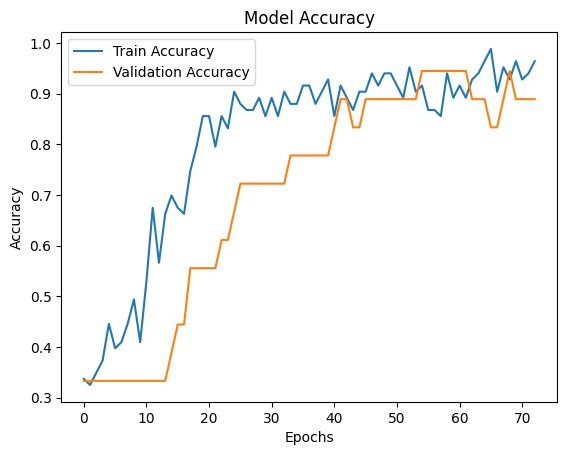

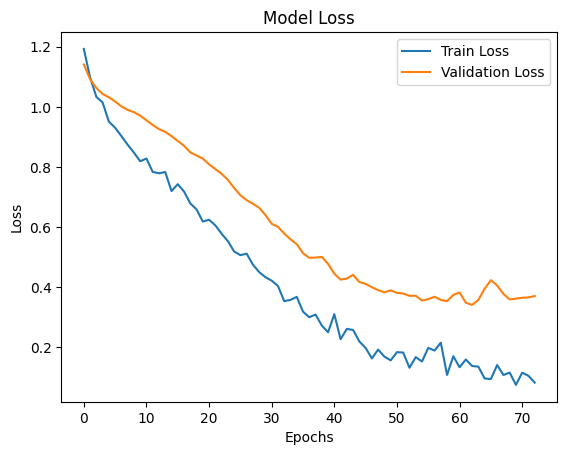

In [19]:
# Accuracy Plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

# Loss Plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')
plt.show()


## Data Augmentation
**Data Augmentation** artificially expands the training dataset by applying transformations like rotation, flipping, scaling, and brightness adjustments. This helps improve model generalization, reduce overfitting, and make the model more robust to variations in real-world data.

In [20]:
# Data Augmentation
datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.2
)
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="sparse",
    subset="training"
)
val_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="sparse",
    subset="validation"
)

Found 96 images belonging to 3 classes.
Found 23 images belonging to 3 classes.


### Why is Data Augmentation Required for Small Datasets?

Small datasets can lead to overfitting, where the model memorizes training data instead of learning general patterns. Data augmentation helps by:

✔ ***Increasing Data Variety*** – Creates new variations of images, making the model more robust.

✔ ***Improving Generalization***– Helps the model perform better on unseen data.

✔ ***Reducing Overfitting*** – Prevents the model from relying too much on limited samples.

✔***Enhancing Model Performance*** – Boosts accuracy by providing more diverse training examples.

For small datasets, data augmentation is essential to simulate real-world variability and improve model reliability. 

### *Third model with Transfer learning and Data Augmentation*




In [21]:
base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
base_model.trainable = True  # Unfreeze layers for fine-tuning

# Fine-tune only the last 20 layers
for layer in base_model.layers[:-20]:
    layer.trainable = False


model_trans = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    #Prevents overfitting by penalizing large weights
    Dropout(0.4),
    Dense(128, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    Dense(64, activation="relu"),
    Dropout(0.3),
    Dense(32, activation="relu"),
    Dense(16, activation="relu"),
    Dropout(0.2),
    Dense(3, activation="softmax")
])

# Optimizer - Using SGD with momentum for better generalization
optimizer = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
# Faster convergence & avoids oscillations.


model_trans.compile(
    optimizer=optimizer,
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [22]:
# Callbacks
early_stopping = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True, verbose=1)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)

# Train Model
history = model_trans.fit(
    train_generator,
    validation_data=val_generator,
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping, lr_scheduler],
    verbose=1
)


Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 22s 4s/step - accuracy: 0.4284 - loss: 7.1717 - val_accuracy: 0.4783 - val_loss: 6.9963 - learning_rate: 0.0100
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.4180 - loss: 7.0171 - val_accuracy: 0.6522 - val_loss: 6.8922 - learning_rate: 0.0100
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.5208 - loss: 6.8704 - val_accuracy: 0.6522 - val_loss: 6.7702 - learning_rate: 0.0100
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.6068 - loss: 6.7815 - val_accuracy: 0.8696 - val_loss: 6.5051 - learning_rate: 0.0100
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.6458 - loss: 6.6638 - val_accuracy: 0.9130 - val_loss: 6.2195 - learning_rate: 0.0100
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.6719 - loss: 6.4192 - val_accuracy: 0.9565 - val_loss: 5.9709 - learning_rate: 0.0100
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.7839 - loss: 6.2332 - val_accuracy: 0.9565 - val_loss: 5

In [23]:
val_loss, val_acc = model_trans.evaluate(val_generator)
print(f"Validation Accuracy: {val_acc:.4f}")
print(f"Validation Loss: {val_loss:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 842ms/step - accuracy: 0.9130 - loss: 4.9393
Validation Accuracy: 0.9130
Validation Loss: 4.9393


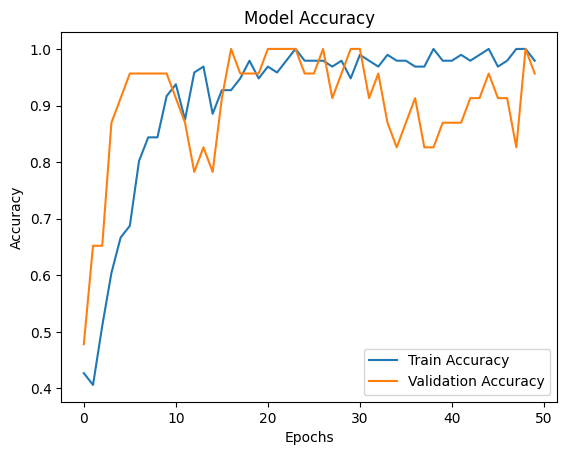

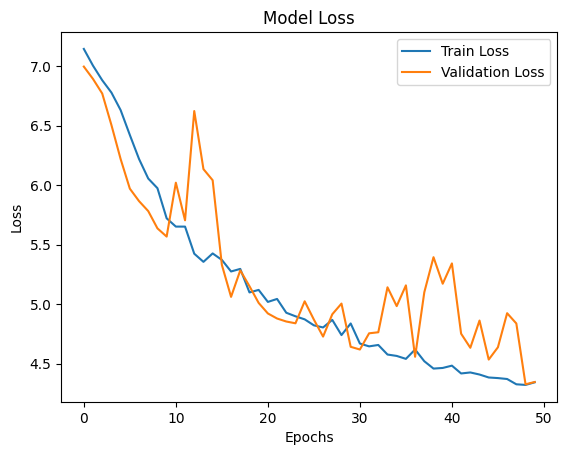

In [24]:
# Accuracy Plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

# Loss Plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')
plt.show()


### *Fourth model with typical CNN and Data Augmentation*





In [25]:
model = Sequential([
    Conv2D(32, (3,3), activation="relu", input_shape=(224, 224, 3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation="relu"),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation="relu"),
    MaxPooling2D(2,2),

    Conv2D(256, (3,3), activation="relu"),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(256, activation="relu"),
    Dense(128, activation="relu"),
    Dense(64, activation="relu"),
    Dense(32,activation='relu'),
    Dropout(0.3),
    Dense(3, activation="softmax")
])


In [26]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 24, 24, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 36864)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 256)                 │       9,437,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,869,187 (37.65 MB)

 Trainable params: 9,869,187 (37.65 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)
# Define EarlyStopping callback
early_stopping = EarlyStopping(
    monitor="val_accuracy",  # Monitor validation loss
    patience=10,          # Stop after 5 epochs of no improvement
    restore_best_weights=True,  # Restore the best model weights
    verbose=1
)
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=50,
    batch_size=32,
    verbose=1
)


Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.4167 - loss: 1.1687 - val_accuracy: 0.3043 - val_loss: 1.1033
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 981ms/step - accuracy: 0.3815 - loss: 1.0913 - val_accuracy: 0.3043 - val_loss: 1.0982
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 994ms/step - accuracy: 0.3411 - loss: 1.0984 - val_accuracy: 0.3043 - val_loss: 1.0961
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.3581 - loss: 1.0941 - val_accuracy: 0.3478 - val_loss: 1.0813
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.4049 - loss: 1.0967 - val_accuracy: 0.4783 - val_loss: 1.0882
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 990ms/step - accuracy: 0.3997 - loss: 1.0966 - val_accuracy: 0.5217 - val_loss: 1.0678
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 971ms/step - accuracy: 0.4089 - loss: 1.0840 - val_accuracy: 0.4783 - val_loss: 1.0388
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.4701 - loss: 1.0631 - val_accuracy: 0.4348 - val_loss: 1.0032
Epo

In [28]:
val_loss, val_acc = model.evaluate(val_generator)
print(f"Validation Accuracy: {val_acc:.4f}")
print(f"Validation Loss: {val_loss:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 523ms/step - accuracy: 0.8261 - loss: 1.1785
Validation Accuracy: 0.8261
Validation Loss: 1.1785


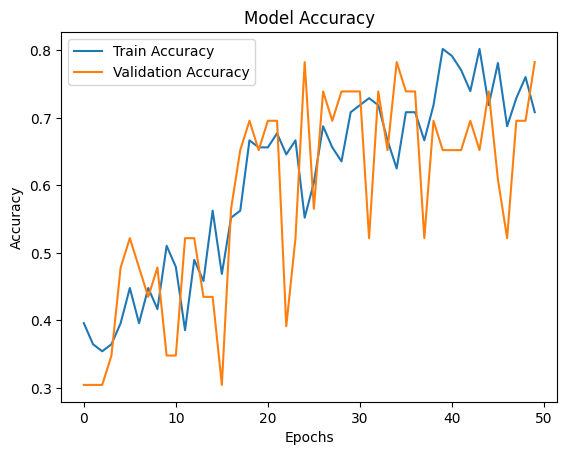

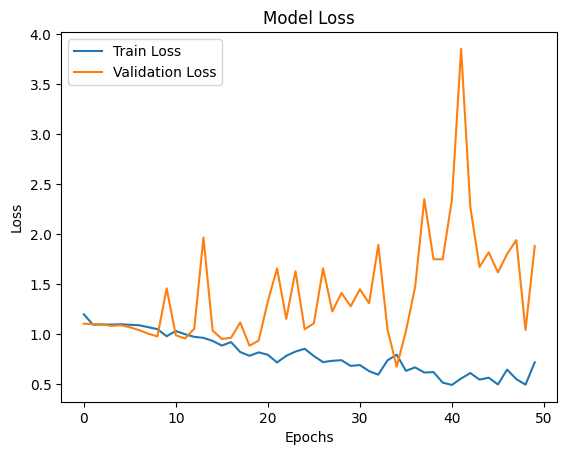

In [29]:
# Accuracy Plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

# Loss Plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')
plt.show()



# **Model Comparison Report**

Create a report stating the performance of multiple models on this data and suggest the best model for production.


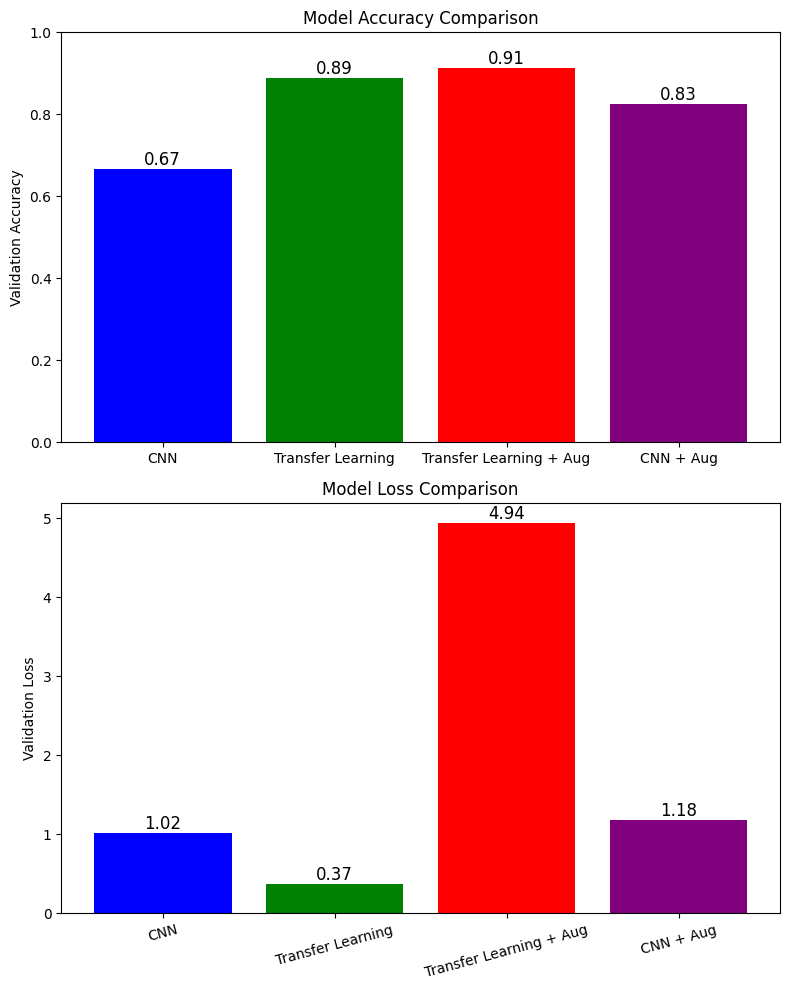

In [32]:
models = ["CNN", "Transfer Learning", "Transfer Learning + Aug", "CNN + Aug"]
val_accuracy = [0.6667, 0.8889, 0.9130, 0.8261]
val_loss = [1.0210, 0.3712, 4.9393, 1.1785]
plt.figure(figsize=(8, 10))


plt.subplot(2, 1, 1)
bars = plt.bar(models, val_accuracy, color=['blue', 'green', 'red', 'purple'])
plt.ylim(0, 1)
plt.ylabel("Validation Accuracy")
plt.title("Model Accuracy Comparison")


for bar, acc in zip(bars, val_accuracy):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{acc:.2f}', ha='center', va='bottom', fontsize=12)

plt.subplot(2, 1, 2)
bars = plt.bar(models, val_loss, color=['blue', 'green', 'red', 'purple'])
plt.ylabel("Validation Loss")
plt.title("Model Loss Comparison")


for bar, loss in zip(bars, val_loss):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{loss:.2f}', ha='center', va='bottom', fontsize=12)

plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


✅ ***Transfer learning + data augmentation*** achieved the highest validation accuracy ***(91.3%)***.

🚫 ***High loss in the augmented transfer learning model (4.9393).***


✅***CNN with data augmentation (82.61%)*** improves over the baseline but is still behind transfer learning models.

✅ ***Transfer learning*** significantly improves performance compared to a simple CNN.

✅ ***Data augmentation*** further enhances accuracy, making models more robust.

# **Challenges Faced**

### **Small dataset size**
***Impact:***  Limited training data can cause overfitting and poor generalization.

***Solution:***  Applied Data Augmentation (rotation, flipping, zooming, shifting) to artificially expand the dataset, improving model robustness.

### **Overfitting in CNN Models**

***Impact:*** High training accuracy but poor validation accuracy.

***Solution:***
Used *Dropout layers* (0.2 - 0.6) to prevent over-reliance on certain features.
Applied *Batch Normalization* for better training stability.
Used *Early Stopping* to prevent unnecessary epochs.

### **Low Initial Accuracy**
***Impact:*** Basic CNN models struggled to extract relevant features.

***Solution:***

Implemented Transfer Learning (MobileNetV2), leveraging pre-trained weights to improve accuracy.
Combined Transfer Learning + Data Augmentation, achieving ***91.3% validation accuracy.***